In [1]:
#predicting the median price of a house in Boston in mid 1970s given the data points about Boston which are crime rate,property taxes etc
from keras.datasets import boston_housing as BH
(train_data,train_targets),(test_data,test_targets) = BH.load_data()

Using TensorFlow backend.


In [2]:
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [66]:
print(test_targets[0])
print("--------------------------------------------------------------")
print(test_data[0])#The range of values are large.Hence we normalize
#ex:for a house in boston with crime rate 1.55,ZN -0.483 ..... 13 columns,the price is 7.2k$

7.2
--------------------------------------------------------------
[ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]


In [4]:
#normalization of features vertically doen the column
import numpy as np
mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)
train_data-=mean
train_data/=std
test_data-=mean
test_data/=std

In [5]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation = "relu",input_shape = (13,)))
    model.add(layers.Dense(64,activation = "relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer = "rmsprop",loss = "mse",metrics = ["mae"])
    return model

In [16]:
#k fold validation
k = 4 #total number of folds
num_fold_samples = len(train_data)//k #no of samples per fold
num_epochs = 500
all_val_scores = []
all_mae_history = []
print(num_fold_samples)

101


In [27]:
for i in range(k):
    val_data = train_data[i*num_fold_samples:(i+1)*num_fold_samples]
    val_targets = train_targets[i*num_fold_samples:(i+1)*num_fold_samples]
    partial_train_data = np.concatenate([train_data[:i*num_fold_samples],train_data[(i+1)*num_fold_samples:]],axis = 0)#concatenate these two arrays
    partial_train_targets = np.concatenate([train_targets[:i*num_fold_samples],train_targets[(i+1)*num_fold_samples:]],axis = 0)
    model = build_model()
    history_obj = model.fit(partial_train_data,partial_train_targets,validation_data = (val_data,val_targets),batch_size = 1,epochs = num_epochs,verbose = 2)
    print(history_obj.history.keys())
    mae_history= history_obj.history["val_mean_absolute_error"]
    all_mae_history.append(mae_history)
    #print(len(all_mae_history))
    #val_mse,val_mae = model.evaluate(val_data,val_targets,verbose = 2)
    #all_val_scores.append(val_mae)

Train on 303 samples, validate on 101 samples
Epoch 1/500
 - 1s - loss: 244.6187 - mean_absolute_error: 11.7607 - val_loss: 36.4620 - val_mean_absolute_error: 3.6510
Epoch 2/500
 - 0s - loss: 27.4319 - mean_absolute_error: 3.5786 - val_loss: 19.9759 - val_mean_absolute_error: 2.6357
Epoch 3/500
 - 0s - loss: 20.2863 - mean_absolute_error: 3.0122 - val_loss: 16.6730 - val_mean_absolute_error: 2.3873
Epoch 4/500
 - 0s - loss: 18.2175 - mean_absolute_error: 2.7783 - val_loss: 15.5956 - val_mean_absolute_error: 2.3837
Epoch 5/500
 - 0s - loss: 17.1964 - mean_absolute_error: 2.6458 - val_loss: 16.2941 - val_mean_absolute_error: 2.5191
Epoch 6/500
 - 0s - loss: 16.0410 - mean_absolute_error: 2.5474 - val_loss: 14.8066 - val_mean_absolute_error: 2.3965
Epoch 7/500
 - 0s - loss: 15.1218 - mean_absolute_error: 2.5228 - val_loss: 15.4158 - val_mean_absolute_error: 2.4552
Epoch 8/500
 - 0s - loss: 14.6094 - mean_absolute_error: 2.4344 - val_loss: 13.6399 - val_mean_absolute_error: 2.2866
Epoch 9/

Epoch 71/500
 - 0s - loss: 5.6750 - mean_absolute_error: 1.5571 - val_loss: 8.8852 - val_mean_absolute_error: 1.9657
Epoch 72/500
 - 0s - loss: 5.5619 - mean_absolute_error: 1.5431 - val_loss: 8.5466 - val_mean_absolute_error: 2.0868
Epoch 73/500
 - 0s - loss: 5.9105 - mean_absolute_error: 1.5670 - val_loss: 9.2306 - val_mean_absolute_error: 2.2215
Epoch 74/500
 - 0s - loss: 5.6075 - mean_absolute_error: 1.5314 - val_loss: 7.1061 - val_mean_absolute_error: 1.8322
Epoch 75/500
 - 0s - loss: 5.6448 - mean_absolute_error: 1.5536 - val_loss: 7.8179 - val_mean_absolute_error: 1.9046
Epoch 76/500
 - 0s - loss: 5.4543 - mean_absolute_error: 1.4953 - val_loss: 8.6672 - val_mean_absolute_error: 1.8973
Epoch 77/500
 - 0s - loss: 5.8378 - mean_absolute_error: 1.5596 - val_loss: 11.1286 - val_mean_absolute_error: 2.7021
Epoch 78/500
 - 0s - loss: 5.4908 - mean_absolute_error: 1.5669 - val_loss: 7.7091 - val_mean_absolute_error: 1.8793
Epoch 79/500
 - 0s - loss: 5.4909 - mean_absolute_error: 1.5261

Epoch 141/500
 - 0s - loss: 3.1605 - mean_absolute_error: 1.2032 - val_loss: 11.9230 - val_mean_absolute_error: 2.6125
Epoch 142/500
 - 0s - loss: 3.2083 - mean_absolute_error: 1.1992 - val_loss: 8.7661 - val_mean_absolute_error: 2.1247
Epoch 143/500
 - 0s - loss: 3.0075 - mean_absolute_error: 1.1561 - val_loss: 11.8873 - val_mean_absolute_error: 2.6415
Epoch 144/500
 - 0s - loss: 3.2086 - mean_absolute_error: 1.2240 - val_loss: 9.1070 - val_mean_absolute_error: 2.1306
Epoch 145/500
 - 0s - loss: 2.8739 - mean_absolute_error: 1.1618 - val_loss: 10.2512 - val_mean_absolute_error: 2.3503
Epoch 146/500
 - 0s - loss: 3.1901 - mean_absolute_error: 1.1965 - val_loss: 9.6623 - val_mean_absolute_error: 2.2093
Epoch 147/500
 - 0s - loss: 2.9120 - mean_absolute_error: 1.1792 - val_loss: 9.0442 - val_mean_absolute_error: 2.1366
Epoch 148/500
 - 0s - loss: 3.2269 - mean_absolute_error: 1.2148 - val_loss: 8.2740 - val_mean_absolute_error: 2.0918
Epoch 149/500
 - 0s - loss: 3.0873 - mean_absolute_er

 - 0s - loss: 2.1465 - mean_absolute_error: 1.0032 - val_loss: 11.3095 - val_mean_absolute_error: 2.4740
Epoch 211/500
 - 0s - loss: 1.8449 - mean_absolute_error: 0.9790 - val_loss: 10.8014 - val_mean_absolute_error: 2.3835
Epoch 212/500
 - 0s - loss: 1.7644 - mean_absolute_error: 0.9439 - val_loss: 12.1227 - val_mean_absolute_error: 2.4978
Epoch 213/500
 - 0s - loss: 2.2085 - mean_absolute_error: 1.0389 - val_loss: 10.6651 - val_mean_absolute_error: 2.3181
Epoch 214/500
 - 0s - loss: 1.8580 - mean_absolute_error: 0.9480 - val_loss: 11.9793 - val_mean_absolute_error: 2.4533
Epoch 215/500
 - 0s - loss: 1.8371 - mean_absolute_error: 0.9946 - val_loss: 11.6223 - val_mean_absolute_error: 2.3864
Epoch 216/500
 - 0s - loss: 1.7973 - mean_absolute_error: 0.9540 - val_loss: 10.4164 - val_mean_absolute_error: 2.2784
Epoch 217/500
 - 0s - loss: 1.9238 - mean_absolute_error: 0.9776 - val_loss: 12.5907 - val_mean_absolute_error: 2.6105
Epoch 218/500
 - 0s - loss: 2.0032 - mean_absolute_error: 0.95

Epoch 279/500
 - 0s - loss: 1.7925 - mean_absolute_error: 0.8809 - val_loss: 10.9227 - val_mean_absolute_error: 2.2934
Epoch 280/500
 - 0s - loss: 1.3166 - mean_absolute_error: 0.8211 - val_loss: 11.6253 - val_mean_absolute_error: 2.4200
Epoch 281/500
 - 0s - loss: 1.7434 - mean_absolute_error: 0.8818 - val_loss: 10.4666 - val_mean_absolute_error: 2.2479
Epoch 282/500
 - 0s - loss: 1.4279 - mean_absolute_error: 0.8155 - val_loss: 11.5985 - val_mean_absolute_error: 2.3162
Epoch 283/500
 - 0s - loss: 1.3926 - mean_absolute_error: 0.8648 - val_loss: 10.3782 - val_mean_absolute_error: 2.3290
Epoch 284/500
 - 0s - loss: 1.6509 - mean_absolute_error: 0.9001 - val_loss: 11.9248 - val_mean_absolute_error: 2.4023
Epoch 285/500
 - 0s - loss: 1.2812 - mean_absolute_error: 0.8323 - val_loss: 10.8986 - val_mean_absolute_error: 2.3372
Epoch 286/500
 - 0s - loss: 1.4170 - mean_absolute_error: 0.8422 - val_loss: 12.8657 - val_mean_absolute_error: 2.4751
Epoch 287/500
 - 0s - loss: 1.3226 - mean_absolu

Epoch 348/500
 - 0s - loss: 1.1574 - mean_absolute_error: 0.7541 - val_loss: 12.6216 - val_mean_absolute_error: 2.3680
Epoch 349/500
 - 0s - loss: 1.2395 - mean_absolute_error: 0.7918 - val_loss: 11.3049 - val_mean_absolute_error: 2.3278
Epoch 350/500
 - 0s - loss: 1.0338 - mean_absolute_error: 0.7281 - val_loss: 11.1358 - val_mean_absolute_error: 2.4217
Epoch 351/500
 - 0s - loss: 1.5099 - mean_absolute_error: 0.7888 - val_loss: 12.2353 - val_mean_absolute_error: 2.3787
Epoch 352/500
 - 0s - loss: 1.1288 - mean_absolute_error: 0.7595 - val_loss: 13.8121 - val_mean_absolute_error: 2.4828
Epoch 353/500
 - 0s - loss: 1.2516 - mean_absolute_error: 0.7849 - val_loss: 10.9742 - val_mean_absolute_error: 2.2709
Epoch 354/500
 - 0s - loss: 1.1666 - mean_absolute_error: 0.7758 - val_loss: 12.3302 - val_mean_absolute_error: 2.3344
Epoch 355/500
 - 0s - loss: 1.2347 - mean_absolute_error: 0.7685 - val_loss: 12.4102 - val_mean_absolute_error: 2.4532
Epoch 356/500
 - 0s - loss: 1.1954 - mean_absolu

Epoch 417/500
 - 0s - loss: 1.0844 - mean_absolute_error: 0.7029 - val_loss: 11.1220 - val_mean_absolute_error: 2.3126
Epoch 418/500
 - 0s - loss: 1.0989 - mean_absolute_error: 0.7450 - val_loss: 10.8198 - val_mean_absolute_error: 2.2263
Epoch 419/500
 - 0s - loss: 1.1954 - mean_absolute_error: 0.7011 - val_loss: 11.0593 - val_mean_absolute_error: 2.3676
Epoch 420/500
 - 0s - loss: 1.0554 - mean_absolute_error: 0.7012 - val_loss: 11.3604 - val_mean_absolute_error: 2.3109
Epoch 421/500
 - 0s - loss: 1.1442 - mean_absolute_error: 0.7493 - val_loss: 11.0911 - val_mean_absolute_error: 2.3856
Epoch 422/500
 - 0s - loss: 0.9563 - mean_absolute_error: 0.7012 - val_loss: 10.4152 - val_mean_absolute_error: 2.2428
Epoch 423/500
 - 0s - loss: 1.0862 - mean_absolute_error: 0.7288 - val_loss: 10.4124 - val_mean_absolute_error: 2.3586
Epoch 424/500
 - 0s - loss: 0.9873 - mean_absolute_error: 0.7142 - val_loss: 11.7192 - val_mean_absolute_error: 2.4898
Epoch 425/500
 - 0s - loss: 1.0384 - mean_absolu

Epoch 486/500
 - 0s - loss: 0.9309 - mean_absolute_error: 0.6888 - val_loss: 11.1449 - val_mean_absolute_error: 2.2084
Epoch 487/500
 - 0s - loss: 1.0379 - mean_absolute_error: 0.6525 - val_loss: 10.9265 - val_mean_absolute_error: 2.2022
Epoch 488/500
 - 0s - loss: 1.0556 - mean_absolute_error: 0.6909 - val_loss: 12.4565 - val_mean_absolute_error: 2.3812
Epoch 489/500
 - 0s - loss: 0.8690 - mean_absolute_error: 0.6712 - val_loss: 12.0511 - val_mean_absolute_error: 2.3577
Epoch 490/500
 - 0s - loss: 1.0405 - mean_absolute_error: 0.7137 - val_loss: 11.8710 - val_mean_absolute_error: 2.2382
Epoch 491/500
 - 0s - loss: 0.8704 - mean_absolute_error: 0.6593 - val_loss: 10.7643 - val_mean_absolute_error: 2.2389
Epoch 492/500
 - 0s - loss: 0.8910 - mean_absolute_error: 0.6636 - val_loss: 11.0353 - val_mean_absolute_error: 2.3431
Epoch 493/500
 - 0s - loss: 1.0144 - mean_absolute_error: 0.7090 - val_loss: 11.5698 - val_mean_absolute_error: 2.3051
Epoch 494/500
 - 0s - loss: 0.8960 - mean_absolu

Epoch 55/500
 - 0s - loss: 6.3729 - mean_absolute_error: 1.6283 - val_loss: 13.1379 - val_mean_absolute_error: 2.9170
Epoch 56/500
 - 0s - loss: 6.0641 - mean_absolute_error: 1.6214 - val_loss: 10.5984 - val_mean_absolute_error: 2.6083
Epoch 57/500
 - 0s - loss: 6.2892 - mean_absolute_error: 1.6152 - val_loss: 10.4829 - val_mean_absolute_error: 2.4782
Epoch 58/500
 - 0s - loss: 5.5736 - mean_absolute_error: 1.5660 - val_loss: 11.5936 - val_mean_absolute_error: 2.7691
Epoch 59/500
 - 0s - loss: 5.9670 - mean_absolute_error: 1.6358 - val_loss: 9.5719 - val_mean_absolute_error: 2.3752
Epoch 60/500
 - 0s - loss: 5.9073 - mean_absolute_error: 1.5883 - val_loss: 11.2672 - val_mean_absolute_error: 2.5639
Epoch 61/500
 - 0s - loss: 5.6696 - mean_absolute_error: 1.5922 - val_loss: 10.4168 - val_mean_absolute_error: 2.5564
Epoch 62/500
 - 0s - loss: 5.6726 - mean_absolute_error: 1.5580 - val_loss: 10.9765 - val_mean_absolute_error: 2.4968
Epoch 63/500
 - 0s - loss: 5.4177 - mean_absolute_error: 

Epoch 125/500
 - 0s - loss: 3.1217 - mean_absolute_error: 1.1992 - val_loss: 16.3838 - val_mean_absolute_error: 2.6395
Epoch 126/500
 - 0s - loss: 3.0714 - mean_absolute_error: 1.1760 - val_loss: 16.3743 - val_mean_absolute_error: 2.6218
Epoch 127/500
 - 0s - loss: 2.9100 - mean_absolute_error: 1.1305 - val_loss: 22.7568 - val_mean_absolute_error: 3.0472
Epoch 128/500
 - 0s - loss: 2.8462 - mean_absolute_error: 1.1609 - val_loss: 25.3834 - val_mean_absolute_error: 3.2167
Epoch 129/500
 - 0s - loss: 2.8567 - mean_absolute_error: 1.1676 - val_loss: 20.7462 - val_mean_absolute_error: 2.8184
Epoch 130/500
 - 0s - loss: 2.6439 - mean_absolute_error: 1.1367 - val_loss: 18.6271 - val_mean_absolute_error: 2.6448
Epoch 131/500
 - 0s - loss: 3.0176 - mean_absolute_error: 1.2074 - val_loss: 18.6226 - val_mean_absolute_error: 2.8709
Epoch 132/500
 - 0s - loss: 2.7616 - mean_absolute_error: 1.1331 - val_loss: 25.0445 - val_mean_absolute_error: 3.2368
Epoch 133/500
 - 0s - loss: 2.7568 - mean_absolu

Epoch 194/500
 - 0s - loss: 1.6898 - mean_absolute_error: 0.9509 - val_loss: 26.7452 - val_mean_absolute_error: 2.9207
Epoch 195/500
 - 0s - loss: 1.5953 - mean_absolute_error: 0.9272 - val_loss: 31.3216 - val_mean_absolute_error: 3.1264
Epoch 196/500
 - 0s - loss: 1.6903 - mean_absolute_error: 0.9511 - val_loss: 27.6399 - val_mean_absolute_error: 3.0833
Epoch 197/500
 - 0s - loss: 1.9736 - mean_absolute_error: 1.0288 - val_loss: 25.7720 - val_mean_absolute_error: 2.9157
Epoch 198/500
 - 0s - loss: 1.7147 - mean_absolute_error: 0.9549 - val_loss: 23.1408 - val_mean_absolute_error: 3.0199
Epoch 199/500
 - 0s - loss: 1.6847 - mean_absolute_error: 0.9386 - val_loss: 25.3906 - val_mean_absolute_error: 2.7865
Epoch 200/500
 - 0s - loss: 1.6731 - mean_absolute_error: 0.9359 - val_loss: 24.7844 - val_mean_absolute_error: 2.8176
Epoch 201/500
 - 0s - loss: 1.7255 - mean_absolute_error: 0.9673 - val_loss: 21.6969 - val_mean_absolute_error: 2.7724
Epoch 202/500
 - 0s - loss: 1.6518 - mean_absolu

Epoch 263/500
 - 0s - loss: 1.3831 - mean_absolute_error: 0.8640 - val_loss: 29.0565 - val_mean_absolute_error: 2.9640
Epoch 264/500
 - 0s - loss: 1.1748 - mean_absolute_error: 0.8395 - val_loss: 29.4158 - val_mean_absolute_error: 3.1085
Epoch 265/500
 - 0s - loss: 1.1354 - mean_absolute_error: 0.7927 - val_loss: 29.0989 - val_mean_absolute_error: 3.3571
Epoch 266/500
 - 0s - loss: 1.1644 - mean_absolute_error: 0.8035 - val_loss: 20.4766 - val_mean_absolute_error: 2.7476
Epoch 267/500
 - 0s - loss: 1.1619 - mean_absolute_error: 0.8244 - val_loss: 33.7722 - val_mean_absolute_error: 3.1411
Epoch 268/500
 - 0s - loss: 1.1419 - mean_absolute_error: 0.7658 - val_loss: 27.2868 - val_mean_absolute_error: 3.1790
Epoch 269/500
 - 0s - loss: 1.1116 - mean_absolute_error: 0.7982 - val_loss: 26.9285 - val_mean_absolute_error: 2.9529
Epoch 270/500
 - 0s - loss: 1.2504 - mean_absolute_error: 0.8017 - val_loss: 31.4422 - val_mean_absolute_error: 3.2270
Epoch 271/500
 - 0s - loss: 1.1947 - mean_absolu

Epoch 332/500
 - 0s - loss: 0.9463 - mean_absolute_error: 0.7250 - val_loss: 36.4654 - val_mean_absolute_error: 3.3296
Epoch 333/500
 - 0s - loss: 0.8948 - mean_absolute_error: 0.7097 - val_loss: 20.0702 - val_mean_absolute_error: 2.9278
Epoch 334/500
 - 0s - loss: 1.1327 - mean_absolute_error: 0.7220 - val_loss: 32.5879 - val_mean_absolute_error: 3.2660
Epoch 335/500
 - 0s - loss: 1.0160 - mean_absolute_error: 0.7272 - val_loss: 33.1726 - val_mean_absolute_error: 3.1294
Epoch 336/500
 - 0s - loss: 0.9826 - mean_absolute_error: 0.7240 - val_loss: 31.8532 - val_mean_absolute_error: 3.3381
Epoch 337/500
 - 0s - loss: 0.8397 - mean_absolute_error: 0.7009 - val_loss: 32.4556 - val_mean_absolute_error: 3.1527
Epoch 338/500
 - 0s - loss: 0.9035 - mean_absolute_error: 0.6920 - val_loss: 36.6428 - val_mean_absolute_error: 3.2983
Epoch 339/500
 - 0s - loss: 0.8897 - mean_absolute_error: 0.7294 - val_loss: 26.5592 - val_mean_absolute_error: 3.0747
Epoch 340/500
 - 0s - loss: 0.8934 - mean_absolu

Epoch 401/500
 - 0s - loss: 0.7763 - mean_absolute_error: 0.6594 - val_loss: 33.9781 - val_mean_absolute_error: 3.1784
Epoch 402/500
 - 0s - loss: 0.7810 - mean_absolute_error: 0.6569 - val_loss: 38.2134 - val_mean_absolute_error: 3.3426
Epoch 403/500
 - 0s - loss: 0.9273 - mean_absolute_error: 0.6792 - val_loss: 31.4141 - val_mean_absolute_error: 3.2821
Epoch 404/500
 - 0s - loss: 0.8013 - mean_absolute_error: 0.6472 - val_loss: 31.2033 - val_mean_absolute_error: 3.3614
Epoch 405/500
 - 0s - loss: 0.8557 - mean_absolute_error: 0.6805 - val_loss: 36.5532 - val_mean_absolute_error: 3.2520
Epoch 406/500
 - 0s - loss: 0.7630 - mean_absolute_error: 0.6586 - val_loss: 27.9028 - val_mean_absolute_error: 3.1087
Epoch 407/500
 - 0s - loss: 0.7852 - mean_absolute_error: 0.6598 - val_loss: 31.2330 - val_mean_absolute_error: 3.2280
Epoch 408/500
 - 0s - loss: 0.8199 - mean_absolute_error: 0.6872 - val_loss: 31.2863 - val_mean_absolute_error: 3.2499
Epoch 409/500
 - 0s - loss: 0.8741 - mean_absolu

Epoch 470/500
 - 0s - loss: 0.7207 - mean_absolute_error: 0.6206 - val_loss: 32.9305 - val_mean_absolute_error: 3.3791
Epoch 471/500
 - 0s - loss: 0.6976 - mean_absolute_error: 0.6252 - val_loss: 29.5626 - val_mean_absolute_error: 3.3278
Epoch 472/500
 - 0s - loss: 0.7879 - mean_absolute_error: 0.6273 - val_loss: 29.0104 - val_mean_absolute_error: 3.1403
Epoch 473/500
 - 0s - loss: 0.6939 - mean_absolute_error: 0.6159 - val_loss: 32.4931 - val_mean_absolute_error: 3.2869
Epoch 474/500
 - 0s - loss: 0.7426 - mean_absolute_error: 0.6251 - val_loss: 27.2079 - val_mean_absolute_error: 3.1907
Epoch 475/500
 - 0s - loss: 0.6688 - mean_absolute_error: 0.6127 - val_loss: 35.6569 - val_mean_absolute_error: 3.3417
Epoch 476/500
 - 0s - loss: 0.8020 - mean_absolute_error: 0.6745 - val_loss: 29.0248 - val_mean_absolute_error: 3.1664
Epoch 477/500
 - 0s - loss: 0.6756 - mean_absolute_error: 0.5932 - val_loss: 28.1103 - val_mean_absolute_error: 3.1679
Epoch 478/500
 - 0s - loss: 0.7444 - mean_absolu

 - 0s - loss: 5.6657 - mean_absolute_error: 1.6375 - val_loss: 14.2838 - val_mean_absolute_error: 2.4095
Epoch 39/500
 - 0s - loss: 5.3019 - mean_absolute_error: 1.6293 - val_loss: 15.5608 - val_mean_absolute_error: 2.5484
Epoch 40/500
 - 0s - loss: 5.3188 - mean_absolute_error: 1.6460 - val_loss: 15.2906 - val_mean_absolute_error: 2.7010
Epoch 41/500
 - 0s - loss: 5.2903 - mean_absolute_error: 1.6689 - val_loss: 15.2741 - val_mean_absolute_error: 2.5774
Epoch 42/500
 - 0s - loss: 5.4490 - mean_absolute_error: 1.5925 - val_loss: 13.5649 - val_mean_absolute_error: 2.3968
Epoch 43/500
 - 0s - loss: 5.2415 - mean_absolute_error: 1.5763 - val_loss: 15.6972 - val_mean_absolute_error: 2.7814
Epoch 44/500
 - 0s - loss: 5.1956 - mean_absolute_error: 1.5500 - val_loss: 14.6170 - val_mean_absolute_error: 2.5654
Epoch 45/500
 - 0s - loss: 4.9581 - mean_absolute_error: 1.5170 - val_loss: 17.1019 - val_mean_absolute_error: 2.9168
Epoch 46/500
 - 0s - loss: 4.8412 - mean_absolute_error: 1.5949 - val

Epoch 108/500
 - 0s - loss: 2.7689 - mean_absolute_error: 1.1784 - val_loss: 13.2896 - val_mean_absolute_error: 2.4851
Epoch 109/500
 - 0s - loss: 2.6899 - mean_absolute_error: 1.1749 - val_loss: 13.7394 - val_mean_absolute_error: 2.6234
Epoch 110/500
 - 0s - loss: 2.5906 - mean_absolute_error: 1.1960 - val_loss: 15.8040 - val_mean_absolute_error: 2.7195
Epoch 111/500
 - 0s - loss: 2.4134 - mean_absolute_error: 1.1430 - val_loss: 14.2324 - val_mean_absolute_error: 2.6318
Epoch 112/500
 - 0s - loss: 2.4544 - mean_absolute_error: 1.1405 - val_loss: 14.4420 - val_mean_absolute_error: 2.6712
Epoch 113/500
 - 0s - loss: 2.5289 - mean_absolute_error: 1.1981 - val_loss: 15.4484 - val_mean_absolute_error: 2.7030
Epoch 114/500
 - 0s - loss: 2.5415 - mean_absolute_error: 1.1992 - val_loss: 14.2466 - val_mean_absolute_error: 2.6293
Epoch 115/500
 - 0s - loss: 2.7262 - mean_absolute_error: 1.2028 - val_loss: 15.6455 - val_mean_absolute_error: 2.7788
Epoch 116/500
 - 0s - loss: 2.6395 - mean_absolu

Epoch 177/500
 - 0s - loss: 1.4531 - mean_absolute_error: 0.8884 - val_loss: 14.2287 - val_mean_absolute_error: 2.6805
Epoch 178/500
 - 0s - loss: 1.7066 - mean_absolute_error: 0.9604 - val_loss: 15.4902 - val_mean_absolute_error: 2.5890
Epoch 179/500
 - 0s - loss: 1.5014 - mean_absolute_error: 0.8925 - val_loss: 13.5947 - val_mean_absolute_error: 2.4507
Epoch 180/500
 - 0s - loss: 1.5999 - mean_absolute_error: 0.9001 - val_loss: 13.9707 - val_mean_absolute_error: 2.6603
Epoch 181/500
 - 0s - loss: 1.5022 - mean_absolute_error: 0.9107 - val_loss: 15.6274 - val_mean_absolute_error: 2.8479
Epoch 182/500
 - 0s - loss: 1.5039 - mean_absolute_error: 0.9119 - val_loss: 16.0330 - val_mean_absolute_error: 2.8018
Epoch 183/500
 - 0s - loss: 1.5715 - mean_absolute_error: 0.9121 - val_loss: 15.4185 - val_mean_absolute_error: 2.6842
Epoch 184/500
 - 0s - loss: 1.4458 - mean_absolute_error: 0.9087 - val_loss: 16.0936 - val_mean_absolute_error: 2.7491
Epoch 185/500
 - 0s - loss: 1.4786 - mean_absolu

Epoch 246/500
 - 0s - loss: 1.3095 - mean_absolute_error: 0.8233 - val_loss: 15.9031 - val_mean_absolute_error: 2.7784
Epoch 247/500
 - 0s - loss: 1.1621 - mean_absolute_error: 0.7898 - val_loss: 15.1979 - val_mean_absolute_error: 2.8020
Epoch 248/500
 - 0s - loss: 1.1189 - mean_absolute_error: 0.8219 - val_loss: 17.1566 - val_mean_absolute_error: 2.9515
Epoch 249/500
 - 0s - loss: 1.1242 - mean_absolute_error: 0.8274 - val_loss: 16.5557 - val_mean_absolute_error: 2.8008
Epoch 250/500
 - 0s - loss: 1.2532 - mean_absolute_error: 0.7827 - val_loss: 16.1107 - val_mean_absolute_error: 2.7594
Epoch 251/500
 - 0s - loss: 1.1044 - mean_absolute_error: 0.7838 - val_loss: 17.1986 - val_mean_absolute_error: 2.9866
Epoch 252/500
 - 0s - loss: 1.2922 - mean_absolute_error: 0.8167 - val_loss: 15.9707 - val_mean_absolute_error: 2.8104
Epoch 253/500
 - 0s - loss: 1.2064 - mean_absolute_error: 0.8198 - val_loss: 17.5824 - val_mean_absolute_error: 2.8850
Epoch 254/500
 - 0s - loss: 1.1712 - mean_absolu

Epoch 315/500
 - 0s - loss: 1.0786 - mean_absolute_error: 0.7395 - val_loss: 16.7521 - val_mean_absolute_error: 2.9007
Epoch 316/500
 - 0s - loss: 1.0299 - mean_absolute_error: 0.7479 - val_loss: 15.5151 - val_mean_absolute_error: 2.8084
Epoch 317/500
 - 0s - loss: 1.0102 - mean_absolute_error: 0.7555 - val_loss: 16.4030 - val_mean_absolute_error: 2.7872
Epoch 318/500
 - 0s - loss: 0.8950 - mean_absolute_error: 0.6915 - val_loss: 17.5029 - val_mean_absolute_error: 2.9498
Epoch 319/500
 - 0s - loss: 0.9342 - mean_absolute_error: 0.7187 - val_loss: 16.8525 - val_mean_absolute_error: 2.8175
Epoch 320/500
 - 0s - loss: 1.0174 - mean_absolute_error: 0.7515 - val_loss: 15.1234 - val_mean_absolute_error: 2.7213
Epoch 321/500
 - 0s - loss: 1.0076 - mean_absolute_error: 0.7291 - val_loss: 15.1306 - val_mean_absolute_error: 2.8161
Epoch 322/500
 - 0s - loss: 0.9286 - mean_absolute_error: 0.7058 - val_loss: 16.3021 - val_mean_absolute_error: 2.8549
Epoch 323/500
 - 0s - loss: 1.0254 - mean_absolu

Epoch 384/500
 - 0s - loss: 0.9085 - mean_absolute_error: 0.6767 - val_loss: 15.6118 - val_mean_absolute_error: 2.8791
Epoch 385/500
 - 0s - loss: 0.8135 - mean_absolute_error: 0.6483 - val_loss: 16.2452 - val_mean_absolute_error: 2.9011
Epoch 386/500
 - 0s - loss: 0.9089 - mean_absolute_error: 0.6525 - val_loss: 15.8952 - val_mean_absolute_error: 2.7395
Epoch 387/500
 - 0s - loss: 0.8084 - mean_absolute_error: 0.6518 - val_loss: 14.7494 - val_mean_absolute_error: 2.7612
Epoch 388/500
 - 0s - loss: 0.8116 - mean_absolute_error: 0.6652 - val_loss: 17.4589 - val_mean_absolute_error: 2.8811
Epoch 389/500
 - 0s - loss: 0.7523 - mean_absolute_error: 0.6261 - val_loss: 15.9158 - val_mean_absolute_error: 2.8839
Epoch 390/500
 - 0s - loss: 0.9173 - mean_absolute_error: 0.6834 - val_loss: 15.5094 - val_mean_absolute_error: 2.8283
Epoch 391/500
 - 0s - loss: 0.7877 - mean_absolute_error: 0.6538 - val_loss: 16.2552 - val_mean_absolute_error: 2.8367
Epoch 392/500
 - 0s - loss: 0.7457 - mean_absolu

Epoch 453/500
 - 0s - loss: 0.7463 - mean_absolute_error: 0.6421 - val_loss: 15.5034 - val_mean_absolute_error: 2.8447
Epoch 454/500
 - 0s - loss: 0.7749 - mean_absolute_error: 0.6209 - val_loss: 15.7265 - val_mean_absolute_error: 2.8735
Epoch 455/500
 - 0s - loss: 0.6318 - mean_absolute_error: 0.5889 - val_loss: 16.0276 - val_mean_absolute_error: 2.7322
Epoch 456/500
 - 0s - loss: 0.7799 - mean_absolute_error: 0.6560 - val_loss: 15.0512 - val_mean_absolute_error: 2.7337
Epoch 457/500
 - 0s - loss: 0.6548 - mean_absolute_error: 0.6071 - val_loss: 15.8576 - val_mean_absolute_error: 2.7903
Epoch 458/500
 - 0s - loss: 0.6794 - mean_absolute_error: 0.6252 - val_loss: 17.0571 - val_mean_absolute_error: 2.8488
Epoch 459/500
 - 0s - loss: 0.7972 - mean_absolute_error: 0.6505 - val_loss: 16.9365 - val_mean_absolute_error: 2.8065
Epoch 460/500
 - 0s - loss: 0.7378 - mean_absolute_error: 0.6335 - val_loss: 16.6588 - val_mean_absolute_error: 2.8590
Epoch 461/500
 - 0s - loss: 0.8617 - mean_absolu

Epoch 21/500
 - 0s - loss: 9.0411 - mean_absolute_error: 1.9169 - val_loss: 15.0547 - val_mean_absolute_error: 2.4521
Epoch 22/500
 - 0s - loss: 8.6186 - mean_absolute_error: 1.9358 - val_loss: 15.8120 - val_mean_absolute_error: 2.6139
Epoch 23/500
 - 0s - loss: 8.0872 - mean_absolute_error: 1.9153 - val_loss: 14.8667 - val_mean_absolute_error: 2.5157
Epoch 24/500
 - 0s - loss: 8.3714 - mean_absolute_error: 1.8801 - val_loss: 15.3685 - val_mean_absolute_error: 2.6727
Epoch 25/500
 - 0s - loss: 7.9264 - mean_absolute_error: 1.8735 - val_loss: 14.1194 - val_mean_absolute_error: 2.6473
Epoch 26/500
 - 0s - loss: 7.5841 - mean_absolute_error: 1.8673 - val_loss: 14.5180 - val_mean_absolute_error: 2.5153
Epoch 27/500
 - 0s - loss: 7.7535 - mean_absolute_error: 1.8236 - val_loss: 14.7369 - val_mean_absolute_error: 2.6817
Epoch 28/500
 - 0s - loss: 7.1774 - mean_absolute_error: 1.7806 - val_loss: 14.1072 - val_mean_absolute_error: 2.5625
Epoch 29/500
 - 0s - loss: 7.2767 - mean_absolute_error:

Epoch 91/500
 - 0s - loss: 4.5236 - mean_absolute_error: 1.3448 - val_loss: 14.5784 - val_mean_absolute_error: 2.8574
Epoch 92/500
 - 0s - loss: 4.3607 - mean_absolute_error: 1.3060 - val_loss: 12.2023 - val_mean_absolute_error: 2.5629
Epoch 93/500
 - 0s - loss: 4.2225 - mean_absolute_error: 1.3269 - val_loss: 12.8223 - val_mean_absolute_error: 2.6561
Epoch 94/500
 - 0s - loss: 4.5721 - mean_absolute_error: 1.3677 - val_loss: 11.7457 - val_mean_absolute_error: 2.4094
Epoch 95/500
 - 0s - loss: 4.2186 - mean_absolute_error: 1.2453 - val_loss: 14.0457 - val_mean_absolute_error: 2.7774
Epoch 96/500
 - 0s - loss: 4.3087 - mean_absolute_error: 1.2781 - val_loss: 12.2759 - val_mean_absolute_error: 2.5090
Epoch 97/500
 - 0s - loss: 4.0830 - mean_absolute_error: 1.2780 - val_loss: 12.9857 - val_mean_absolute_error: 2.5945
Epoch 98/500
 - 0s - loss: 4.3139 - mean_absolute_error: 1.3077 - val_loss: 12.6939 - val_mean_absolute_error: 2.4861
Epoch 99/500
 - 0s - loss: 4.3819 - mean_absolute_error:

Epoch 160/500
 - 0s - loss: 3.0649 - mean_absolute_error: 1.1217 - val_loss: 14.1936 - val_mean_absolute_error: 2.6312
Epoch 161/500
 - 0s - loss: 3.0395 - mean_absolute_error: 1.0929 - val_loss: 14.4280 - val_mean_absolute_error: 2.6598
Epoch 162/500
 - 0s - loss: 3.2547 - mean_absolute_error: 1.1271 - val_loss: 14.4470 - val_mean_absolute_error: 2.7007
Epoch 163/500
 - 0s - loss: 3.1114 - mean_absolute_error: 1.1435 - val_loss: 14.8675 - val_mean_absolute_error: 2.7894
Epoch 164/500
 - 0s - loss: 2.8876 - mean_absolute_error: 1.1007 - val_loss: 13.2082 - val_mean_absolute_error: 2.5633
Epoch 165/500
 - 0s - loss: 2.9574 - mean_absolute_error: 1.1107 - val_loss: 14.0813 - val_mean_absolute_error: 2.7136
Epoch 166/500
 - 0s - loss: 2.9990 - mean_absolute_error: 1.1092 - val_loss: 20.3535 - val_mean_absolute_error: 3.3795
Epoch 167/500
 - 0s - loss: 3.0226 - mean_absolute_error: 1.1204 - val_loss: 13.5903 - val_mean_absolute_error: 2.5566
Epoch 168/500
 - 0s - loss: 2.7808 - mean_absolu

Epoch 229/500
 - 0s - loss: 2.1723 - mean_absolute_error: 0.9925 - val_loss: 15.2779 - val_mean_absolute_error: 2.7788
Epoch 230/500
 - 0s - loss: 1.9469 - mean_absolute_error: 0.9569 - val_loss: 17.3002 - val_mean_absolute_error: 2.8980
Epoch 231/500
 - 0s - loss: 2.0255 - mean_absolute_error: 0.9860 - val_loss: 16.0295 - val_mean_absolute_error: 2.9455
Epoch 232/500
 - 0s - loss: 2.1158 - mean_absolute_error: 0.9970 - val_loss: 14.4865 - val_mean_absolute_error: 2.6339
Epoch 233/500
 - 0s - loss: 1.9675 - mean_absolute_error: 0.9968 - val_loss: 15.2142 - val_mean_absolute_error: 2.7341
Epoch 234/500
 - 0s - loss: 2.0094 - mean_absolute_error: 0.9776 - val_loss: 15.1021 - val_mean_absolute_error: 2.7976
Epoch 235/500
 - 0s - loss: 2.1070 - mean_absolute_error: 0.9977 - val_loss: 17.7390 - val_mean_absolute_error: 3.0710
Epoch 236/500
 - 0s - loss: 2.1701 - mean_absolute_error: 1.0125 - val_loss: 15.2788 - val_mean_absolute_error: 2.7982
Epoch 237/500
 - 0s - loss: 2.0427 - mean_absolu

Epoch 298/500
 - 0s - loss: 1.5074 - mean_absolute_error: 0.9067 - val_loss: 16.2165 - val_mean_absolute_error: 2.8482
Epoch 299/500
 - 0s - loss: 1.4106 - mean_absolute_error: 0.8625 - val_loss: 17.0245 - val_mean_absolute_error: 2.9878
Epoch 300/500
 - 0s - loss: 1.3416 - mean_absolute_error: 0.8631 - val_loss: 16.4273 - val_mean_absolute_error: 2.8004
Epoch 301/500
 - 0s - loss: 1.4205 - mean_absolute_error: 0.8708 - val_loss: 16.9280 - val_mean_absolute_error: 2.9917
Epoch 302/500
 - 0s - loss: 1.4102 - mean_absolute_error: 0.8494 - val_loss: 14.9659 - val_mean_absolute_error: 2.7303
Epoch 303/500
 - 0s - loss: 1.3865 - mean_absolute_error: 0.8738 - val_loss: 16.2836 - val_mean_absolute_error: 2.8874
Epoch 304/500
 - 1s - loss: 1.5363 - mean_absolute_error: 0.9229 - val_loss: 15.8158 - val_mean_absolute_error: 2.7075
Epoch 305/500
 - 1s - loss: 1.5221 - mean_absolute_error: 0.8772 - val_loss: 15.9387 - val_mean_absolute_error: 2.8984
Epoch 306/500
 - 0s - loss: 1.5881 - mean_absolu

Epoch 367/500
 - 0s - loss: 1.0041 - mean_absolute_error: 0.7366 - val_loss: 15.4137 - val_mean_absolute_error: 2.7620
Epoch 368/500
 - 0s - loss: 1.3782 - mean_absolute_error: 0.8040 - val_loss: 15.7244 - val_mean_absolute_error: 2.7756
Epoch 369/500
 - 0s - loss: 1.2039 - mean_absolute_error: 0.7779 - val_loss: 15.9453 - val_mean_absolute_error: 2.7948
Epoch 370/500
 - 0s - loss: 1.1252 - mean_absolute_error: 0.7528 - val_loss: 15.5175 - val_mean_absolute_error: 2.7278
Epoch 371/500
 - 0s - loss: 1.1830 - mean_absolute_error: 0.7718 - val_loss: 17.8079 - val_mean_absolute_error: 2.9925
Epoch 372/500
 - 0s - loss: 0.9895 - mean_absolute_error: 0.7283 - val_loss: 16.4270 - val_mean_absolute_error: 2.8126
Epoch 373/500
 - 0s - loss: 1.2130 - mean_absolute_error: 0.7623 - val_loss: 16.2656 - val_mean_absolute_error: 2.8469
Epoch 374/500
 - 0s - loss: 1.1068 - mean_absolute_error: 0.7606 - val_loss: 16.1714 - val_mean_absolute_error: 2.7899
Epoch 375/500
 - 0s - loss: 1.2031 - mean_absolu

Epoch 436/500
 - 0s - loss: 0.9268 - mean_absolute_error: 0.7089 - val_loss: 16.4429 - val_mean_absolute_error: 2.9460
Epoch 437/500
 - 0s - loss: 1.0086 - mean_absolute_error: 0.7169 - val_loss: 16.7982 - val_mean_absolute_error: 2.9828
Epoch 438/500
 - 0s - loss: 0.9274 - mean_absolute_error: 0.7108 - val_loss: 16.9628 - val_mean_absolute_error: 2.9436
Epoch 439/500
 - 0s - loss: 0.8753 - mean_absolute_error: 0.6694 - val_loss: 15.6920 - val_mean_absolute_error: 2.8314
Epoch 440/500
 - 0s - loss: 1.0270 - mean_absolute_error: 0.7135 - val_loss: 16.8897 - val_mean_absolute_error: 2.9849
Epoch 441/500
 - 0s - loss: 0.8653 - mean_absolute_error: 0.6821 - val_loss: 17.0531 - val_mean_absolute_error: 2.9368
Epoch 442/500
 - 0s - loss: 1.1199 - mean_absolute_error: 0.7475 - val_loss: 16.6563 - val_mean_absolute_error: 2.8899
Epoch 443/500
 - 0s - loss: 0.8566 - mean_absolute_error: 0.6789 - val_loss: 16.3981 - val_mean_absolute_error: 2.9109
Epoch 444/500
 - 0s - loss: 1.1068 - mean_absolu

No handles with labels found to put in legend.


490
490


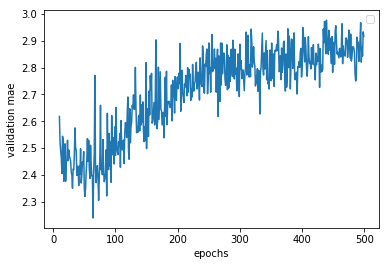

In [72]:
#plotting the validation scores vs the epochs
import matplotlib.pyplot as plt
x = [x for x in range(10,num_epochs)]
y = [np.mean([x[i] for x in all_mae_history]) for i in range(10,num_epochs)]
print(len(x))
print(len(y))
plt.xlabel("epochs")
plt.ylabel("validation mae")
plt.plot(x,y)
plt.legend()
plt.show()
#print(y)

In [73]:
'''import matplotlib.pyplot as plt
temp = []
for i in all_mae_history:
    for j in i:
        temp.append(j)
y1 = temp[0:500]
len(y)
x = [x for x in range(1,num_epochs+1)]
#y = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]
print(len(x))
print(len(y1))
plt.xlabel("epochs")
plt.ylabel("validation mae")
plt.plot(x,y1)
plt.legend()
plt.show()
print(y1)'''

'import matplotlib.pyplot as plt\ntemp = []\nfor i in all_mae_history:\n    for j in i:\n        temp.append(j)\ny1 = temp[0:500]\nlen(y)\nx = [x for x in range(1,num_epochs+1)]\n#y = [np.mean([x[i] for x in all_mae_history]) for i in range(num_epochs)]\nprint(len(x))\nprint(len(y1))\nplt.xlabel("epochs")\nplt.ylabel("validation mae")\nplt.plot(x,y1)\nplt.legend()\nplt.show()\nprint(y1)'

In [64]:
#hence from above graph we can tell that after 80 epochs the mae starts increasing and overfitting starts,hence optimal epoch = 80
#no need val_data as we have already done it
final_model = build_model()
final_model.fit(train_data,train_targets,epochs = num_epochs,batch_size = 16,verbose = 0)
test_mse,test_mae = final_model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 2ms/step


In [68]:
print(test_mae)#we are still off by 2.4k$ for a predicted house

2.43665392258588
